In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [10]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [45]:
# Load the CSV file into a DataFrame and set 'coin_id' as the index
market_data_df = pd.read_csv('crypto_market_data.csv', index_col="coin_id")

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the data (excluding the index)
scaled_data = scaler.fit_transform(market_data_df)

# Create a DataFrame with the scaled data, using the original column names and index
scaled_df = pd.DataFrame(scaled_data, columns=market_data_df.columns, index=market_data_df.index)

# Display sample data (first five rows)
scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [49]:
# Load the CSV file into a DataFrame and set 'coin_id' as the index
market_data_df = pd.read_csv('crypto_market_data.csv', index_col="coin_id")

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the data (excluding the index)
scaled_data = scaler.fit_transform(market_data_df)

# Create a DataFrame with the scaled data, using the original column names
scaled_df = pd.DataFrame(scaled_data, columns=market_data_df.columns)

# Copy the 'coin_id' index from the original data and add it as a new column
scaled_df['coin_id'] = market_data_df.index

# Set the 'coin_id' column as the index
scaled_df.set_index('coin_id', inplace=True)

# Display sample data (first five rows)
scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

     k     inertia
0    1  287.000000
1    2  195.820218
2    3  123.190482
3    4   79.022435
4    5   65.302379
5    6   52.888518
6    7   43.914690
7    8   37.517032
8    9   32.485241
9   10   28.222899
10  11   24.545513


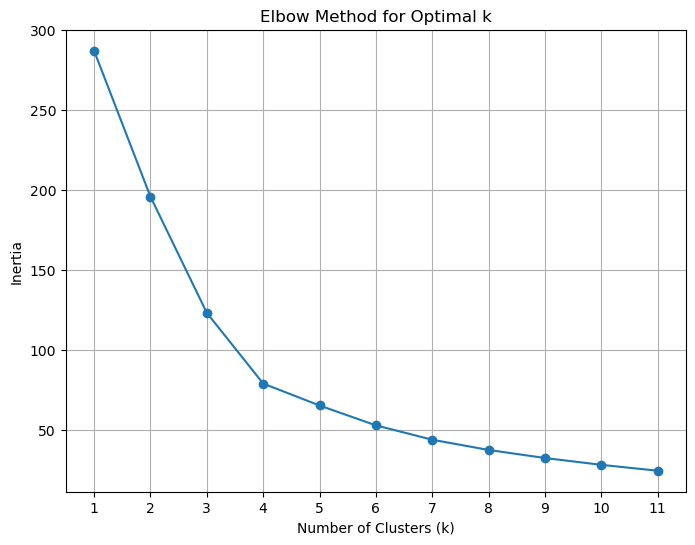

In [53]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a list with the number of k-values to try (from 1 to 11)
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the data using the scaled DataFrame
    kmeans.fit(scaled_df)
    
    # Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


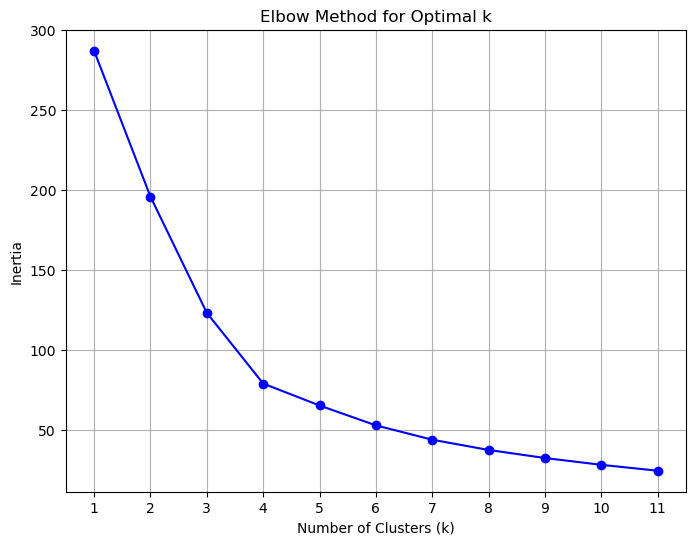

In [55]:
import matplotlib.pyplot as plt

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])
plt.grid(True)
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [61]:
from sklearn.cluster import KMeans

# Assume the best value for k from the elbow method is 4 (replace with your actual best k value)
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=0)

In [63]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [71]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(scaled_df)
clustered_df = scaled_df.copy()
clustered_df['Cluster'] = clusters
# View the resulting array of cluster values.
clustered_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [73]:
# Create a copy of the DataFrame
clustered_df = scaled_df.copy()

In [75]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df['Cluster'] = clusters

# Display sample data
clustered_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


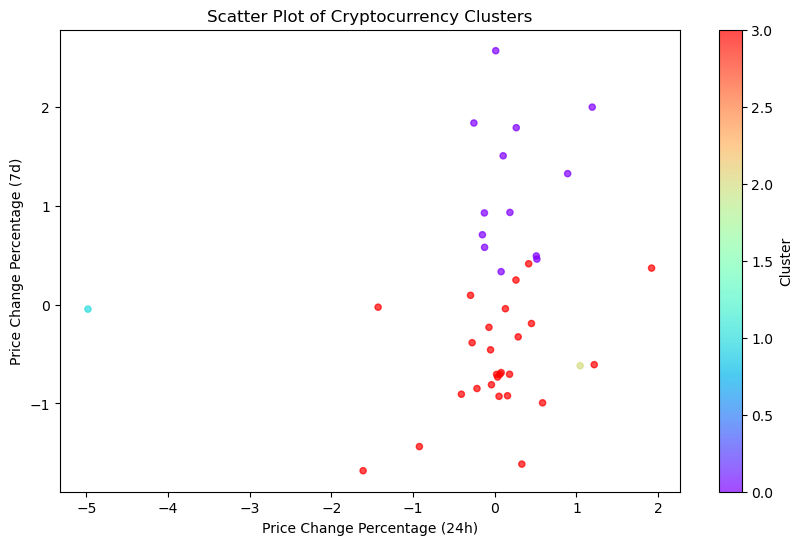

In [79]:
# Create a scatter plot with Pandas
ax = clustered_df.plot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='Cluster',  # Color by cluster
    colormap='rainbow',  # Use rainbow colormap
    alpha=0.7,  # Set transparency for better visualization
    figsize=(10, 6)  # Set figure size
)

# Add title and labels
plt.title('Scatter Plot of Cryptocurrency Clusters')
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')

# Show the plot
plt.show()


### Optimize Clusters with Principal Component Analysis.

In [81]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [83]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(scaled_df)

# View the first five rows of the DataFrame. 
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=scaled_df.index)

# Display the first few rows of the PCA DataFrame
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [89]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance_ratio = pca.explained_variance_ratio_

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [91]:
# Create a DataFrame with the PCA data and set the 'coin_id' index
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=scaled_df.index)

# Add the 'coin_id' column from the original DataFrame
pca_df['coin_id'] = market_data_df.index

# Set the 'coin_id' column as the index
pca_df.set_index('coin_id', inplace=True)

# Display the first few rows of the PCA DataFrame
pca_df.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [99]:
from sklearn.cluster import KMeans

# Step 1: Create a list with the number of k-values to try (1 to 11)
k_values = range(1, 12)

# Step 2: Create an empty list to store the inertia values
inertia_values = []

# Step 3: Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the PCA DataFrame
    kmeans.fit(pca_df)
    
    # Append the model's inertia to the inertia list
    inertia_values.append(kmeans.inertia_)

# Step 4: Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'Inertia': inertia_values
}

# Step 5: Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)



/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

     k     Inertia
0    1  256.874086
1    2  168.811896
2    3   93.774626
3    4   49.665497
4    5   37.878747
5    6   27.618972
6    7   21.182776
7    8   17.091637
8    9   13.667065
9   10   10.559358
10  11    8.177490


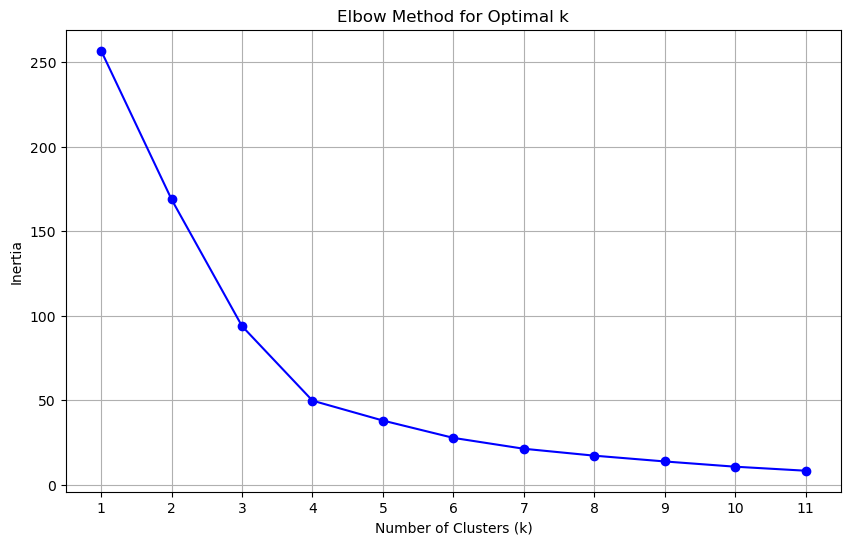

In [103]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['Inertia'], marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])  # Ensure all k values are shown on the x-axis

# Show the plot
plt.grid(True)
plt.show()


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [117]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=best_k, random_state=42)

In [119]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [121]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_df['Cluster'] = kmeans.predict(pca_df)

# Print the resulting array of cluster values.
pca_df.head()

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


In [125]:
# Step 1: Create a copy of the PCA DataFrame (ensure no additional columns are in this DataFrame)
pca_df_copy = pca_df.copy()

# Step 2: Add a new column with the predicted clusters
# Ensure no 'Cluster' column exists before predicting
if 'Cluster' in pca_df_copy.columns:
    pca_df_copy = pca_df_copy.drop(columns='Cluster')

# Predict clusters using the PCA DataFrame
pca_df_copy['Cluster'] = kmeans.predict(pca_df)

# Step 3: Display sample data
pca_df_copy.head()


,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


In [133]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import hvplot.pandas  # Import hvPlot

# Create a scatter plot using hvPlot
scatter_plot = pca_df_copy.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    c='Cluster',  # Color points by the cluster they belong to
    cmap='rainbow',  # Use the rainbow colormap for different clusters
    title='PCA Scatter Plot with Clusters',  # Title of the plot
    size=50,  # Size of the scatter plot points
    xlabel='PCA1',  # Label for x-axis
    ylabel='PCA2'   # Label for y-axis
)

# Show the plot
scatter_plot


DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['PCA1', 'PCA2']

PandasInterface expects tabular data, for more information on supported datatypes see http://holoviews.org/user_guide/Tabular_Datasets.html

### Determine the Weights of Each Feature on each Principal Component

In [135]:
# Use the columns from the original scaled DataFrame as the index.
pca_df_copy.index = scaled_df.index

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    